In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

В наборе данных не заданы названия признаков. Составим этот список на основании https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names

In [233]:
headers = np.array(['class', 'cap_shape', 'cap_surface',
  'cap_color', 'bruises', 'odor', 'gill_attachment',
  'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape',
  'stalk_root', 'stalk_surface_above_ring',
  'stalk_surface_below_ring', 'stalk_color_above_ring',
  'stalk_color_below_ring', 'veil_type', 'veil_color',
  'ring_number', 'ring_type', 'spore_print_color',
  'population', 'habitat'
])

In [234]:
data = pd.read_csv('agaricus-lepiota.data', sep=',', engine='python', names=headers)

In [235]:
type(data)

pandas.core.frame.DataFrame

Для красоты переименуем все значения признаков. В оригинале они заданы одним символом. Расшифровка взята из https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names

In [236]:
classes = {'e':'edible', 'p':'poisonous'}
attributes = {
    'cap_shape': {'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat',
                 'k':'knobbed', 's':'sunken'},
    'cap_surface': {'f':'fibrous', 'g':'grooves', 'y':'scaly', 's':'smooth'},
    'cap_color': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green',
                  'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'},
    'bruises': {'t':'bruises', 'f':'no'},
    'odor': {'a':'almond', 'l':'anise', 'c':'creosote', 'y':'fishy','f':'foul',
             'm':'musty', 'n':'none', 'p':'pungent', 's':'spicy'},
    'gill_attachment': {'a':'attached', 'd':'descending', 'f':'free', 'n':'notched'},
    'gill_spacing': {'c':'close', 'w':'crowded', 'd':'distant'},
    'gill_size': {'b':'broad', 'n':'narrow'},
    'gill_color': {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'g':'gray',
                   'r':'green', 'o':'orange', 'p':'pink', 'u':'purple', 'e':'red',
                   'w':'white', 'y':'yellow'},
    'stalk_shape': {'e':'enlarging', 't':'tapering'},
    'stalk_root': {'b':'bulbous', 'c':'club', 'u':'cup', 'e':'equal',
                   'z':'rhizomorphs','r':'rooted', '?':'missing'},
    'stalk_surface_above_ring': {'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'},
    'stalk_surface_below_ring': {'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'},
    'stalk_color_above_ring': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange',
                               'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'},
    'stalk_color_below_ring': {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange',
                               'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'},
    'veil_type': {'p':'partial', 'u':'universal'},
    'veil_color': {'n':'brown', 'o':'orange', 'w':'white', 'y':'yellow'},
    'ring_number': {'n':'none', 'o':'one', 't':'two'},
    'ring_type': {'c':'cobwebby', 'e':'evanescent', 'f':'flaring', 'l':'large',
                  'n':'none', 'p':'pendant', 's':'sheathing', 'z':'zone'},
    'spore_print_color': {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate',
                          'r':'green', 'o':'orange', 'u':'purple', 'w':'white', 'y':'yellow'},
    'population': {'a':'abundant', 'c':'clustered', 'n':'numerous',
                   's':'scattered','v':'several','y':'solitary'},
    'habitat': {'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'u':'urban', 'w':'waste', 
                'd':'woods'}
}

In [237]:
for class_ in classes.keys():
    data.at[data['class'] == class_, 'class'] = classes.get(class_)

In [238]:
for attribute in attributes.items():
    for attr_ in attribute[1].keys():
        data.at[data[attribute[0]] == attr_, attribute[0]] = attribute[1].get(attr_)

In [239]:
data

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,edible,bell,smooth,white,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,edible,bell,scaly,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,edible,bell,smooth,yellow,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


In [240]:
print(data)

          class cap_shape cap_surface cap_color  bruises     odor  \
0     poisonous    convex      smooth     brown  bruises  pungent   
1        edible    convex      smooth    yellow  bruises   almond   
2        edible      bell      smooth     white  bruises    anise   
3     poisonous    convex       scaly     white  bruises  pungent   
4        edible    convex      smooth      gray       no     none   
5        edible    convex       scaly    yellow  bruises   almond   
6        edible      bell      smooth     white  bruises   almond   
7        edible      bell       scaly     white  bruises    anise   
8     poisonous    convex       scaly     white  bruises  pungent   
9        edible      bell      smooth    yellow  bruises   almond   
10       edible    convex       scaly    yellow  bruises    anise   
11       edible    convex       scaly    yellow  bruises   almond   
12       edible      bell      smooth    yellow  bruises   almond   
13    poisonous    convex       sc

In [241]:
data.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [242]:
data.tail()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves
8123,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,orange,clustered,leaves


In [243]:
print(data.shape)
print(data.columns)

(8124, 23)
Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')


In [244]:
data.index

RangeIndex(start=0, stop=8124, step=1)

In [245]:
data.at[2, 'gill_attachment']

'free'

In [246]:
data['gill_attachment']

0           free
1           free
2           free
3           free
4           free
5           free
6           free
7           free
8           free
9           free
10          free
11          free
12          free
13          free
14          free
15          free
16          free
17          free
18          free
19          free
20          free
21          free
22          free
23          free
24          free
25          free
26          free
27          free
28          free
29          free
          ...   
8094        free
8095        free
8096        free
8097        free
8098        free
8099        free
8100    attached
8101        free
8102    attached
8103    attached
8104    attached
8105    attached
8106    attached
8107    attached
8108        free
8109        free
8110    attached
8111        free
8112    attached
8113        free
8114    attached
8115    attached
8116        free
8117        free
8118        free
8119    attached
8120    attached
8121    attach

In [247]:
data['stalk_shape'][10]

'enlarging'

In [248]:
data.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


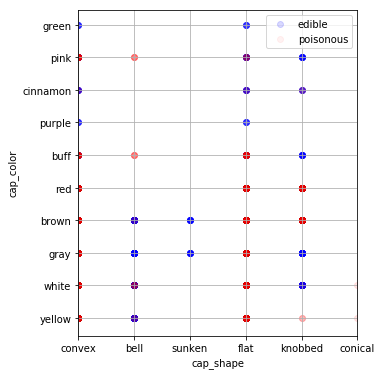

In [249]:
plt.figure(figsize=(5,6))
plt.scatter(data[data['class'] == 'edible']['cap_shape'],
            data[data['class'] == 'edible']['cap_color'],
            alpha = 0.15,
            label = 'edible',
            color = 'b')

plt.scatter(data[data['class'] == 'poisonous']['cap_shape'],
            data[data['class'] == 'poisonous']['cap_color'],
            alpha = 0.05,
            label = 'poisonous',
            color = 'r')

plt.xlabel('cap_shape')
plt.xticks(range(18))
plt.xlim(0, 5)
plt.ylabel('cap_color')
plt.legend()
plt.grid()

### Замечание
Так сложились звезды, что все признаки в наборе - категориальные. 
Поэтому, чтобы работать с данными было интереснее, сразу перейдем к обработке данных и векторизации.

In [250]:
data.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [251]:
for c in data.columns:
    print(c, data[c].unique())

class ['poisonous' 'edible']
cap_shape ['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
cap_surface ['smooth' 'scaly' 'fibrous' 'grooves']
cap_color ['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
bruises ['bruises' 'no']
odor ['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
gill_attachment ['free' 'attached']
gill_spacing ['close' 'crowded']
gill_size ['narrow' 'broad']
gill_color ['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
stalk_shape ['enlarging' 'tapering']
stalk_root ['equal' 'club' 'bulbous' 'rooted' 'missing']
stalk_surface_above_ring ['smooth' 'fibrous' 'silky' 'scaly']
stalk_surface_below_ring ['smooth' 'fibrous' 'scaly' 'silky']
stalk_color_above_ring ['white' 'gray' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yellow']
stalk_color_below_ring ['white' 'pink' 'gray' 'buff' 'brown' 'red' 'yellow' 'orange' 'cinnamon']
veil_type ['partial']
veil_color

### Замечание 2
`Missing Attribute Values: 2480 of them (denoted by "?"), all for attribute #11.`

Если по-русски, то все значения `missing` признака `stalk_root` это по сути "пропуски".
Заменим их на самое популярное значение этого признака.

Ещё раз проверим, что кроме `missing` у нас нет других "артефактов":

In [252]:
data[data.columns].count(axis = 0)

class                       8124
cap_shape                   8124
cap_surface                 8124
cap_color                   8124
bruises                     8124
odor                        8124
gill_attachment             8124
gill_spacing                8124
gill_size                   8124
gill_color                  8124
stalk_shape                 8124
stalk_root                  8124
stalk_surface_above_ring    8124
stalk_surface_below_ring    8124
stalk_color_above_ring      8124
stalk_color_below_ring      8124
veil_type                   8124
veil_color                  8124
ring_number                 8124
ring_type                   8124
spore_print_color           8124
population                  8124
habitat                     8124
dtype: int64

In [253]:
data['stalk_root'].describe()

count        8124
unique          5
top       bulbous
freq         3776
Name: stalk_root, dtype: object

In [254]:
data['stalk_root'].describe().top

'bulbous'

In [255]:
data.at[data['stalk_root'] == 'missing', 'stalk_root'] = data['stalk_root'].describe().top
data['stalk_root'].describe()

count        8124
unique          4
top       bulbous
freq         6256
Name: stalk_root, dtype: object

## Векторизация

In [256]:
binary_columns    = [c for c in data.columns if data.describe()[c]['unique'] == 2]
nonbinary_columns = [c for c in data.columns if data.describe()[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['class', 'bruises', 'gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape'] ['cap_shape', 'cap_surface', 'cap_color', 'odor', 'gill_color', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']


In [257]:
for binary_column in binary_columns:
    values = data[binary_column].unique()
    data.at[data[binary_column] == values[0], binary_column] = 0
    data.at[data[binary_column] == values[1], binary_column] = 1

In [258]:
data_nonbinary  = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['cap_shape_bell', 'cap_shape_conical', 'cap_shape_convex',
       'cap_shape_flat', 'cap_shape_knobbed', 'cap_shape_sunken',
       'cap_surface_fibrous', 'cap_surface_grooves', 'cap_surface_scaly',
       'cap_surface_smooth',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=105)


In [259]:
data = pd.concat((data_nonbinary, data[binary_columns]), axis = 1)

In [260]:
data.shape

(8124, 111)

In [261]:
data.describe()

,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken,cap_surface_fibrous,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.055638,0.000492,0.450025,0.387986,0.101920,0.003939,0.285574,0.000492,0.399311,0.314623,...,0.153619,0.497292,0.210734,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634,0.387494
std,0.229235,0.022185,0.497527,0.487321,0.302562,0.062641,0.451715,0.022185,0.489787,0.464394,...,0.360605,0.500023,0.407855,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914,0.487208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## X и y

In [262]:
X = data.drop(('class'), axis = 1)
y = data['class']
feature_names = X.columns

In [263]:
feature_names

Index(['cap_shape_bell', 'cap_shape_conical', 'cap_shape_convex',
       'cap_shape_flat', 'cap_shape_knobbed', 'cap_shape_sunken',
       'cap_surface_fibrous', 'cap_surface_grooves', 'cap_surface_scaly',
       'cap_surface_smooth',
       ...
       'habitat_meadows', 'habitat_paths', 'habitat_urban', 'habitat_waste',
       'habitat_woods', 'bruises', 'gill_attachment', 'gill_spacing',
       'gill_size', 'stalk_shape'],
      dtype='object', length=110)

In [264]:
print(X.shape)
print(y.shape)
N, d = X.shape

(8124, 110)
(8124,)


In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

5686 2438
